<a href="https://colab.research.google.com/github/jsuj1th/LAMA-Segmentation/blob/main/sam_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3osjl5x8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3osjl5x8
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=dbe6653227f2669d9d127afb877b6863bde68e625de02060e2da5dc956000429
  Stored in directory: /tmp/pip-ephem-wheel-cache-w1kvnc85/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [2]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
image_path = "/content/drive/MyDrive/1079.png"
import numpy as np
from PIL import Image
import requests
from io import BytesIO

try:
    # Attempt to open the image as a local file
    pil_image = Image.open(image_path)
    # Convert PIL Image to numpy array
    image = np.array(pil_image)
    print(f"Image loaded successfully from {image_path}")
except FileNotFoundError:
    try:
        # If local file not found, try as a URL
        response = requests.get(image_path)
        response.raise_for_status()
        pil_image = Image.open(BytesIO(response.content))
        # Convert PIL Image to numpy array
        image = np.array(pil_image)
        print(f"Image loaded successfully from URL: {image_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error loading image from URL: {e}")
    except Exception as e:
        print(f"Error loading image: {e}")
except Exception as e:
    print(f"Error loading image: {e}")

Image loaded successfully from /content/drive/MyDrive/1079.png


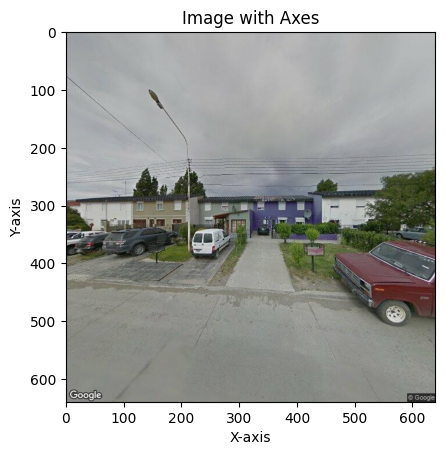

In [4]:
# prompt: display image with axes

import matplotlib.pyplot as plt

# Assuming 'image' is already defined from the previous code
plt.imshow(image)
plt.axis('on')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Image with Axes")
plt.show()


In [5]:
input_point = np.array([[230, 350]])
input_label = np.array([1])

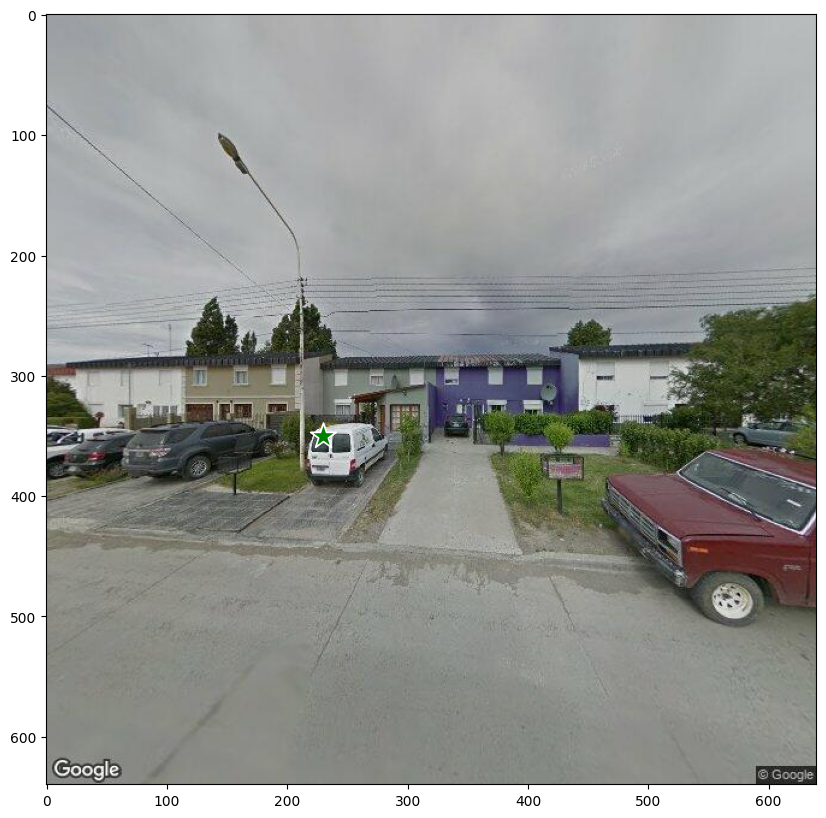

In [6]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [7]:
from segment_anything import SamPredictor,SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["default"](checkpoint="/content/drive/MyDrive/sam_vit_h_4b8939.pth").to(device="cuda")
predictor = SamPredictor(sam)
predictor.set_image(image)
# masks, _, _ = predictor.predict("Mask the Road")
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
# mask_generator = SamAutomaticMaskGenerator(sam)
# masks = mask_generator.generate(image)

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [8]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

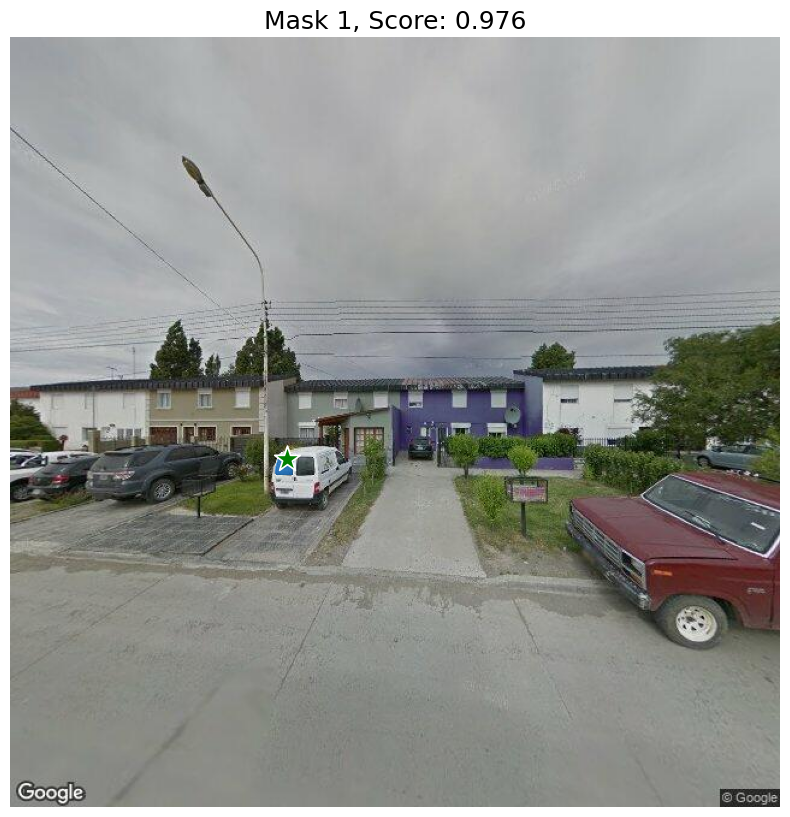

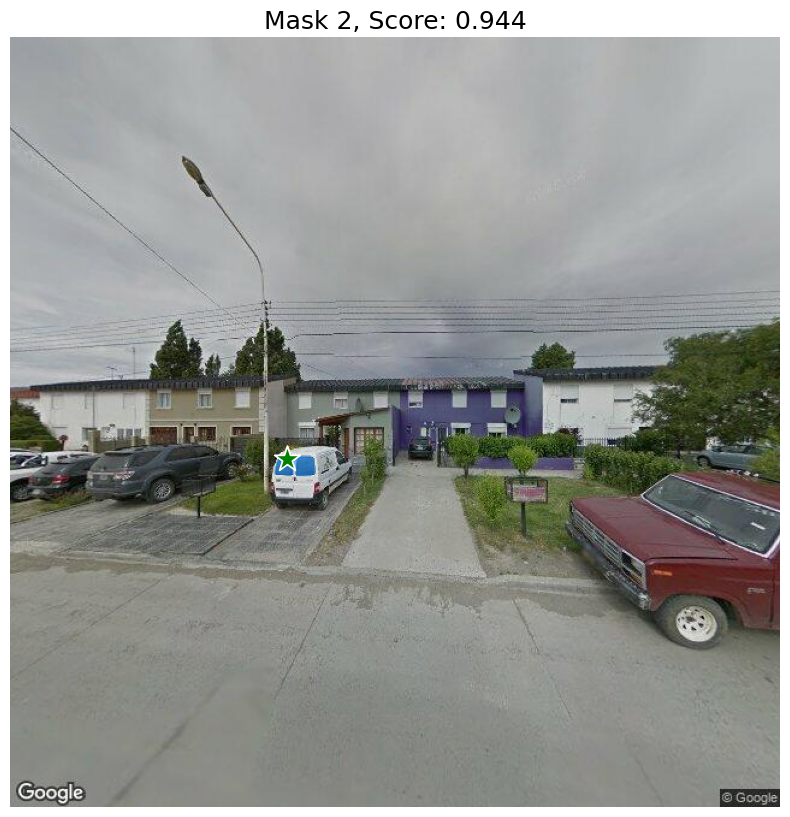

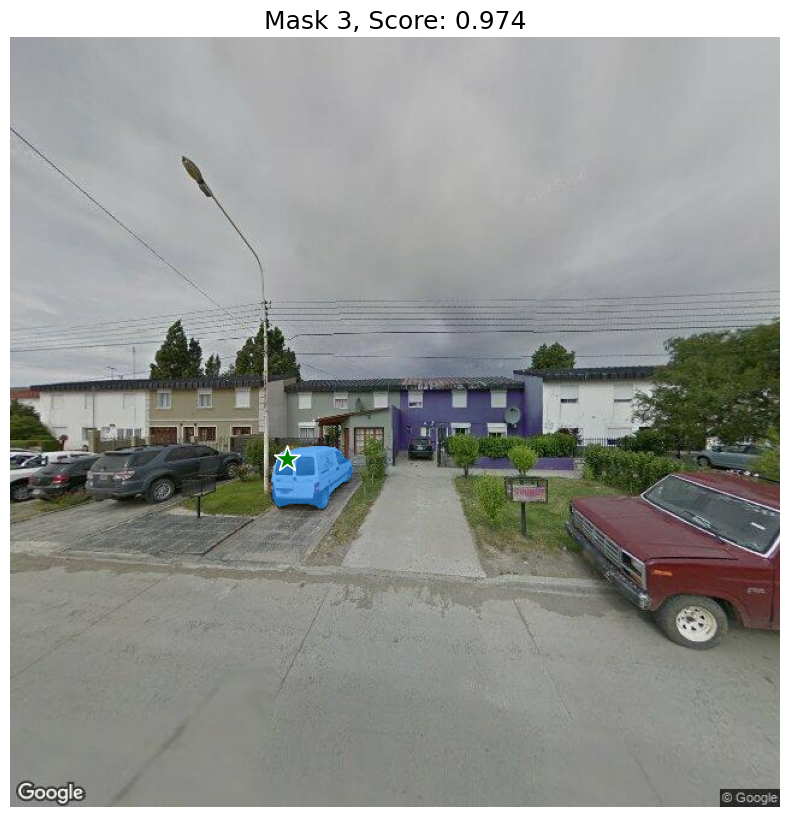

In [9]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

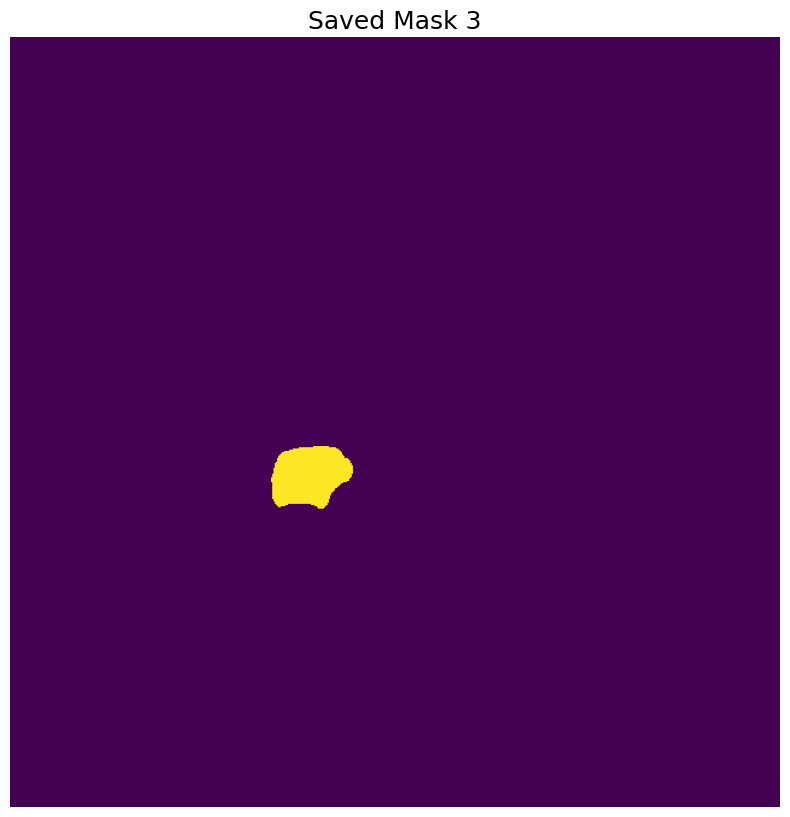

In [10]:
# prompt: save mask 3

from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'masks' is already defined from the previous code and contains the masks generated by SAM
# Save the third mask (index 2) as an image file
mask_to_save = masks[2]  # Access the third mask
mask_image = Image.fromarray(mask_to_save.astype(np.uint8) * 255)  # Convert boolean mask to an 8-bit image
mask_image.save("mask_3.png")  # Save the image

# Display the saved mask (optional)
plt.figure(figsize=(10,10))
plt.imshow(mask_image)
plt.title("Saved Mask 3", fontsize=18)
plt.axis('off')
plt.show()
